<div style="text-align: center; font-family: 'Helvetica Neue', sans-serif; padding-top: 60px; line-height: 1.6;">

  <h1 style="color: #001F79; font-size: 24pt; font-weight: bold;">
    PROGRAMMATION ET MATHÉMATIQUES<br>
    POUR LA SCIENCE DES DONNÉES
  </h1>

  <h2 style="color: darkred; font-weight: bold; font-size: 16pt; ">Mini-projet</h2>

  <br>

  <img src="logo_FSG.jpg" alt="Logo Université Laval" width="250" style="display: block; margin: auto;">

  <h3 style="color: black; font-weight: normal;">Réalisé par</h3>

  <h3 style="color: darkred; font-weight: bold; margin-top: -10px;">
    Thierry Fotchou Saadem
  </h3>

  <hr style="width: 50%; border: 1px solid darkred; margin-top: 40px;">

  <p style="color: #666; text-align: center;"> 28 Juillet 2025</p>

</div>


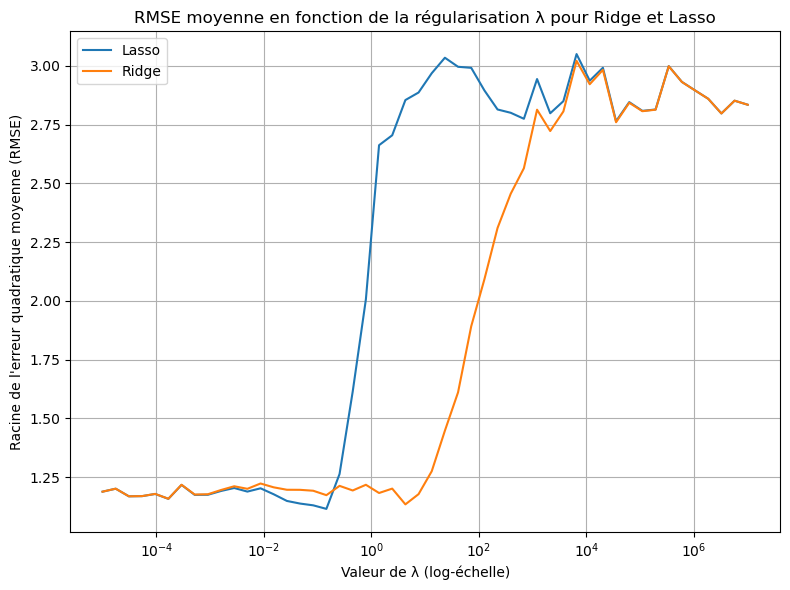

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# ======== PARAMÈTRES À MODIFIER ========
n = 100               # Nombre d’observations simulées
p = 20                # Nombre total de variables explicatives
k = 8                 # Nombre de variables réellement informatives (i.e., dont les coefficients sont non nuls)
sigma = 1.0           # Écart-type du bruit ajouté à la variable réponse
n_repeats = 50        # Nombre de répétitions de la simulation pour chaque valeur de lambda
test_size = 0.3       # Proportion du jeu de données allouée à l’ensemble de test (30%)
lambdas = np.logspace(-5, 7, 50)  # Plage de valeurs de régularisation lambda testée (échelle logarithmique)
# =======================================

# Graine aléatoire pour assurer la reproductibilité
np.random.seed(5)

def generate_data(n=n, p=p, k=k, sigma=sigma):
    """
    Génère un jeu de données synthétique pour un simuler une régression linéaire.
    - n : nombre d’observations
    - p : nombre total de variables
    - k : nombre de variables réellement informatives (i.e., dont les coefficients sont non nuls)
    - sigma : écart-type du bruit aléatoire
    Retourne :
      - X : matrice des variables explicatives (n x p)
      - y : vecteur réponse de taille n
      - beta : coefficients réels utilisés pour générer les données
    """
    X = np.random.randn(n, p)           # Génère un design aléatoire de taille n x p
    beta = np.zeros(p)                  # Initialise le vecteur de coefficients à zéro
    beta[ :k] = np.random.randn(k)       # Les k premiers coefficients sont non nuls
    y = X @ beta + np.random.normal(0, sigma, n)  # Génère la réponse avec bruit
    return X, y, beta

# Initialisation des listes pour stocker les RMSE moyens de chaque méthode
rmse_lasso, rmse_ridge = [], []

# Boucle pour obtenir la Moyenne sur 50 répétitions pour chaque lambda
for lam in lambdas:
    lasso_scores, ridge_scores = [], []

    for _ in range(n_repeats):
        X, y, _ = generate_data()  # Génère les données
        # Divise les données  en jeu d'entraînement et de test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        
        # Ajuste un modèle Lasso avec la valeur actuelle de lambda (alpha)
        lasso = Lasso(alpha=lam, max_iter=10000).fit(X_train, y_train)
        # Ajuste un modèle Ridge avec la même valeur de lambda
        ridge = Ridge(alpha=lam).fit(X_train, y_train)

        # Calcul des RMSE sur le jeu de test pour chaque modèle
        lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
        ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))

        # Stockage des erreurs dans les listes
        lasso_scores.append(lasso_rmse)
        ridge_scores.append(ridge_rmse)
    
    # Moyenne des RMSE sur les 50 répétitions pour chaque lambda
    rmse_lasso.append(np.mean(lasso_scores))
    rmse_ridge.append(np.mean(ridge_scores))

# ======== Figure finale ========
plt.figure(figsize=(8, 6))
plt.plot(lambdas, rmse_lasso, label="Lasso")   # Courbe Lasso
plt.plot(lambdas, rmse_ridge, label="Ridge")   # Courbe Ridge
plt.xscale("log")                              # Axe des x en échelle logarithmique
plt.xlabel("Valeur de λ (log-échelle)")        # Label de l’axe x
plt.ylabel("Racine de l'erreur quadratique moyenne (RMSE)")  # Label de l’axe y
plt.title("RMSE moyenne en fonction de la régularisation λ pour Ridge et Lasso") # Titre de la figure évocateur 
plt.legend()                                   # Affiche la légende
plt.grid(True)                                 # Grille pour lisibilité
plt.tight_layout()                             # Ajustement automatique de la mise en page
plt.savefig("figure_ridge_lasso.png")          # Sauvegarde la figure en PNG
plt.show()                                     # Affiche la figure à l’écran
